Task 1: Exploratory Data Analysis (EDA) and Business Insights

1. Loading and Inspecting Data

In [100]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [101]:
#uploading dataset
customers= pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [102]:
#basic info of customers
print(customers.info(), "\n")
print(customers.describe(include='all'), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3 



In [103]:
#basic info of products
print(products.info(), "\n")
print(products.describe(include='all'), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    N

In [104]:
#basic info of transactions
print(transactions.info(),"\n")
print(transactions.describe(include='all'), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None 

       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean            

2. Data Cleaning

In [105]:
# Remove duplicates from customers
customers = customers.drop_duplicates()
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [106]:
#Remove duplicates from products
products = products.drop_duplicates()
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [107]:
#Remove duplocates from transaction
transactions = transactions.drop_duplicates()
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [108]:
#Check for null values customers
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [109]:
# Check for null values of production
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [110]:
# Check for null values of transaction
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [111]:
# Validate numeric columns
print(transactions[transactions['Quantity'] < 0])  # Negative quantities
print(transactions[transactions['Price'] < 0])    # Negative prices
print(products[products['Price'] < 0]) # Negative product prices

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


3. Data Relationships and Merging

In [112]:
# Merge transactions with customers
merged_data = transactions.merge(customers, on='CustomerID', how='left')

# Merge with products
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Check the resulting dataset
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

4. Exploratory Analysis
*   Number of customers by region.
*   Monthly/Yearly sign-up trends.








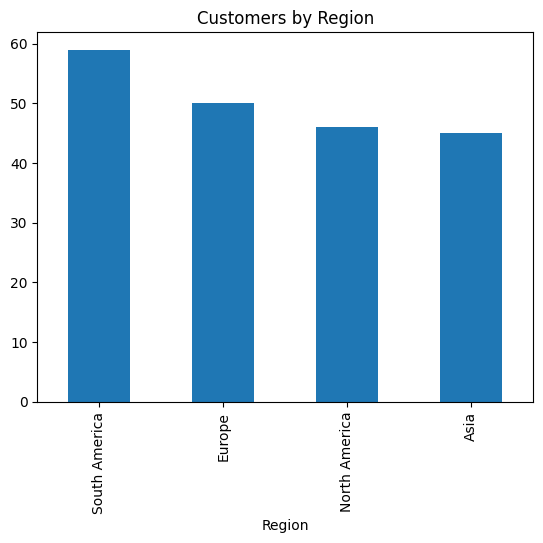

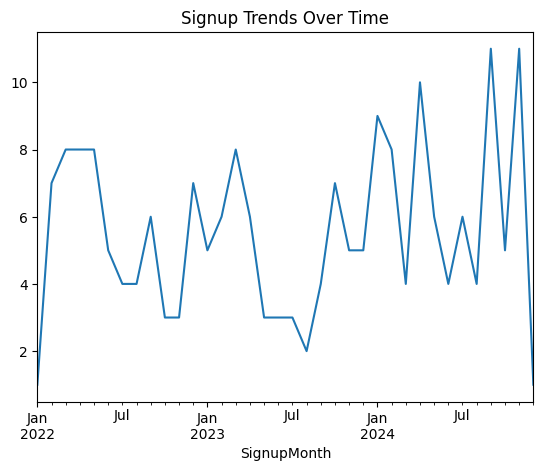

In [113]:
# Customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region')
plt.show()

# Signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index()

signup_trends.plot(kind='line', title='Signup Trends Over Time')
plt.show()

B. Products
*   Count and distribution by category.
*   Price distribution.




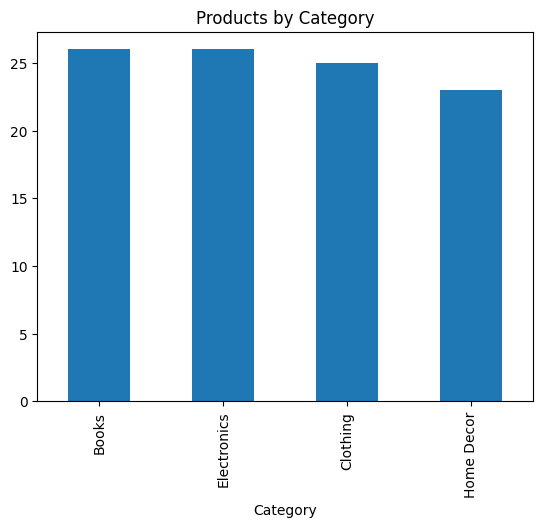

In [114]:
# Products by category
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Products by Category')
plt.show()

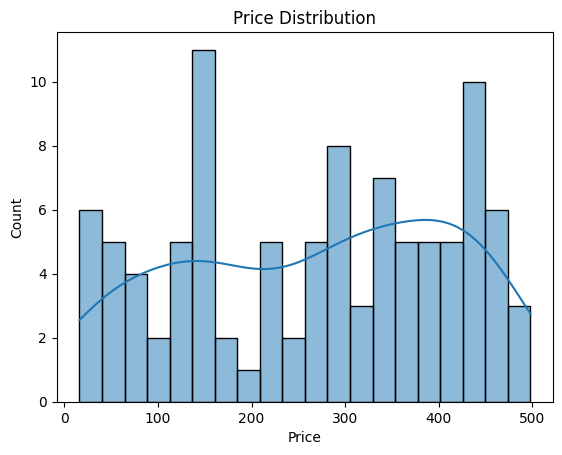

In [115]:
# Price distribution
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

C. Transactions
*   Monthly transaction trends.
*  Top products by sales volume and revenue.
*   Top customers by revenue.









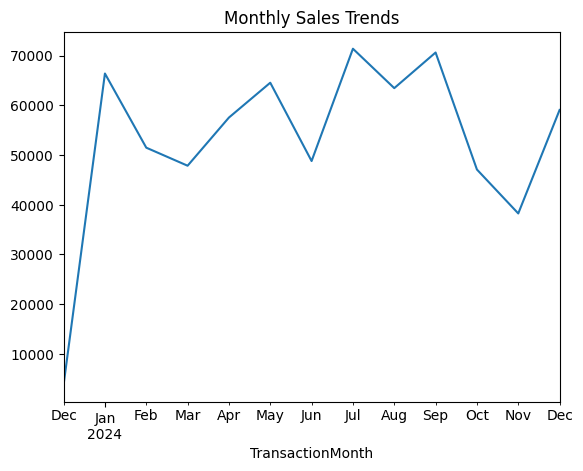

In [116]:
# Monthly transaction trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.show()


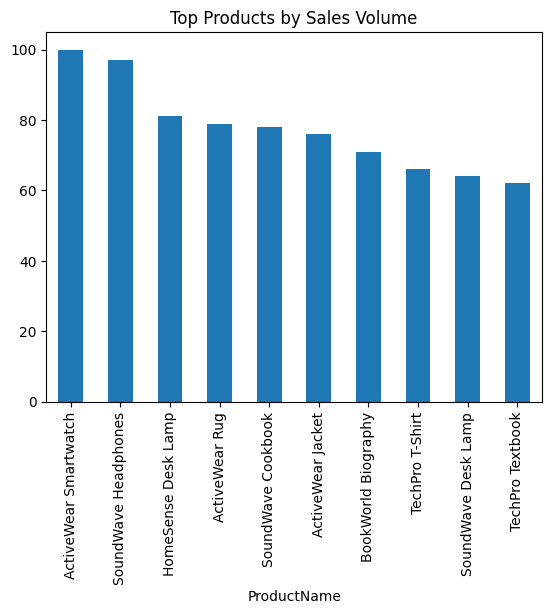

In [117]:
# Top products by sales volume
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top Products by Sales Volume')
plt.show()


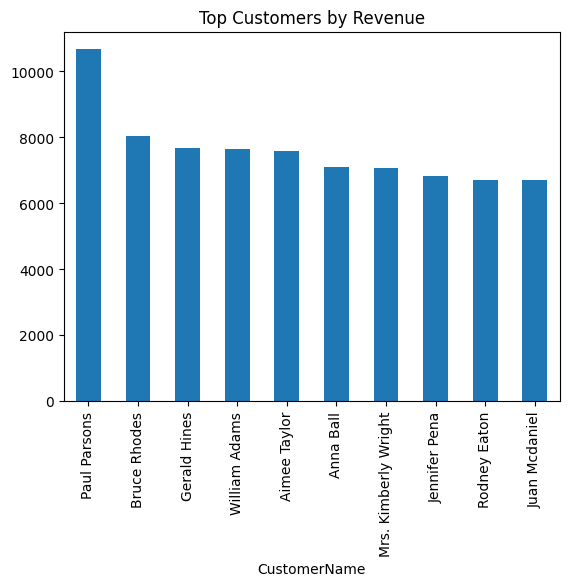

In [118]:
# Top customers by revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top Customers by Revenue')
plt.show()

Here are five business insights derived from the EDA:

* Customer Distribution: Certain regions have significantly higher customer counts, suggesting potential markets for focused marketing and expansion.
* Customer Signup Trends: Peak signup periods can be used to predict customer acquisition trends and allocate resources during those times.
* Popular Product Categories: Some product categories dominate sales, indicating areas for increased investment or promotion.
* Seasonal Sales Patterns: Monthly sales trends reveal seasonal spikes, which can guide inventory planning and marketing campaigns.
* Top Customers' Contribution: Identifying high-revenue customers allows for personalized strategies to increase retention and revenue generation.
